In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [2]:
# Ghazanfar Ali
df = pd.read_csv('/kaggle/input/detected-bird-sound-info/birds_split_df.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,birdName,fileName,startTime,endTime,duration,newStartTime,newEndTime
0,0,0,aldfly,XC134874.mp3,1.361508,1.501389,0.139881,0.000000,0.139881
1,1,1,aldfly,XC134874.mp3,11.563490,11.768649,0.205159,0.139881,0.345040
2,2,2,aldfly,XC134874.mp3,14.490000,14.710000,0.220000,0.345040,0.565040
3,3,3,aldfly,XC134874.mp3,18.610000,18.850000,0.240000,0.565040,0.805040
4,4,4,aldfly,XC134874.mp3,20.610000,20.840000,0.230000,0.805040,1.035040


In [3]:
# Ghazanfar Ali
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287503 entries, 0 to 287502
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0.1  287503 non-null  int64  
 1   Unnamed: 0    287503 non-null  int64  
 2   birdName      287503 non-null  object 
 3   fileName      287503 non-null  object 
 4   startTime     287503 non-null  float64
 5   endTime       287503 non-null  float64
 6   duration      287503 non-null  float64
 7   newStartTime  287503 non-null  float64
 8   newEndTime    287503 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 19.7+ MB


In [4]:
# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
         Unnamed: 0.1     Unnamed: 0      startTime        endTime  \
count  287503.000000  287503.000000  287503.000000  287503.000000   
mean   143751.000000  143751.000000      66.465396      67.228270   
std     82995.111559   82995.111559     118.096515     118.093128   
min         0.000000       0.000000      -0.490000       0.000000   
25%     71875.500000   71875.500000      11.210000      11.906555   
50%    143751.000000  143751.000000      31.574730      32.360000   
75%    215626.500000  215626.500000      76.273193      77.130000   
max    287502.000000  287502.000000    2250.510000    2250.620000   

            duration   newStartTime     newEndTime  
count  287503.000000  287503.000000  287503.000000  
mean        0.762874     742.254659     743.017533  
std         1.460119     924.099611     924.124916  
min         0.000000       0.000000       0.024114  
25%         0.240000     197.240077     197.984810  
50%         0.400000     468.032744    

In [5]:
# table after removing range of rows from 100 to 287502(not included)
df.drop(df.index[100:287502], inplace=True)
 
display(df)

,Unnamed: 0.1,Unnamed: 0,birdName,fileName,startTime,endTime,duration,newStartTime,newEndTime
0,0,0,aldfly,XC134874.mp3,1.361508,1.501389,0.139881,0.000000,0.139881
1,1,1,aldfly,XC134874.mp3,11.563490,11.768649,0.205159,0.139881,0.345040
2,2,2,aldfly,XC134874.mp3,14.490000,14.710000,0.220000,0.345040,0.565040
3,3,3,aldfly,XC134874.mp3,18.610000,18.850000,0.240000,0.565040,0.805040
4,4,4,aldfly,XC134874.mp3,20.610000,20.840000,0.230000,0.805040,1.035040
...,...,...,...,...,...,...,...,...,...
96,96,96,aldfly,XC135460.mp3,34.570000,35.150000,0.580000,32.414417,32.994417
97,97,97,aldfly,XC135460.mp3,36.280000,36.790000,0.510000,32.994417,33.504417
98,98,98,aldfly,XC135460.mp3,38.975905,39.175271,0.199366,33.504417,33.703783
99,99,99,aldfly,XC135460.mp3,39.441091,39.873049,0.431958,33.703783,34.135741


In [6]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'birdName', 'fileName', 'startTime',
       'endTime', 'duration', 'newStartTime', 'newEndTime'],
      dtype='object')

count    101.000000
mean      17.440916
std       14.353200
min        0.010000
25%        5.800317
50%       16.310000
75%       26.800000
max      102.207401
Name: startTime, dtype: float64


/tmp/ipykernel_20/463133065.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['startTime'], color='brown', bins=100, hist_kws={'alpha': 0.4});


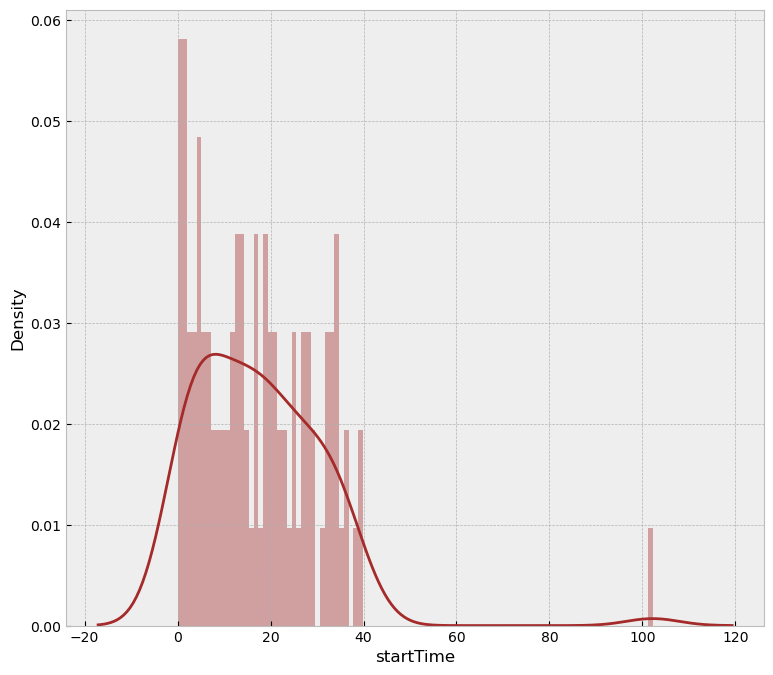

In [7]:
print(df['startTime'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['startTime'], color='brown', bins=100, hist_kws={'alpha': 0.4});

In [8]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

In [9]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Unnamed: 0.1,Unnamed: 0,startTime,endTime,duration,newStartTime,newEndTime
0,0,0,1.361508,1.501389,0.139881,0.000000,0.139881
1,1,1,11.563490,11.768649,0.205159,0.139881,0.345040
2,2,2,14.490000,14.710000,0.220000,0.345040,0.565040
3,3,3,18.610000,18.850000,0.240000,0.565040,0.805040
4,4,4,20.610000,20.840000,0.230000,0.805040,1.035040


array([[<Axes: title={'center': 'Unnamed: 0.1'}>,
        <Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'startTime'}>],
       [<Axes: title={'center': 'endTime'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'newStartTime'}>],
       [<Axes: title={'center': 'newEndTime'}>, <Axes: >, <Axes: >]],
      dtype=object)

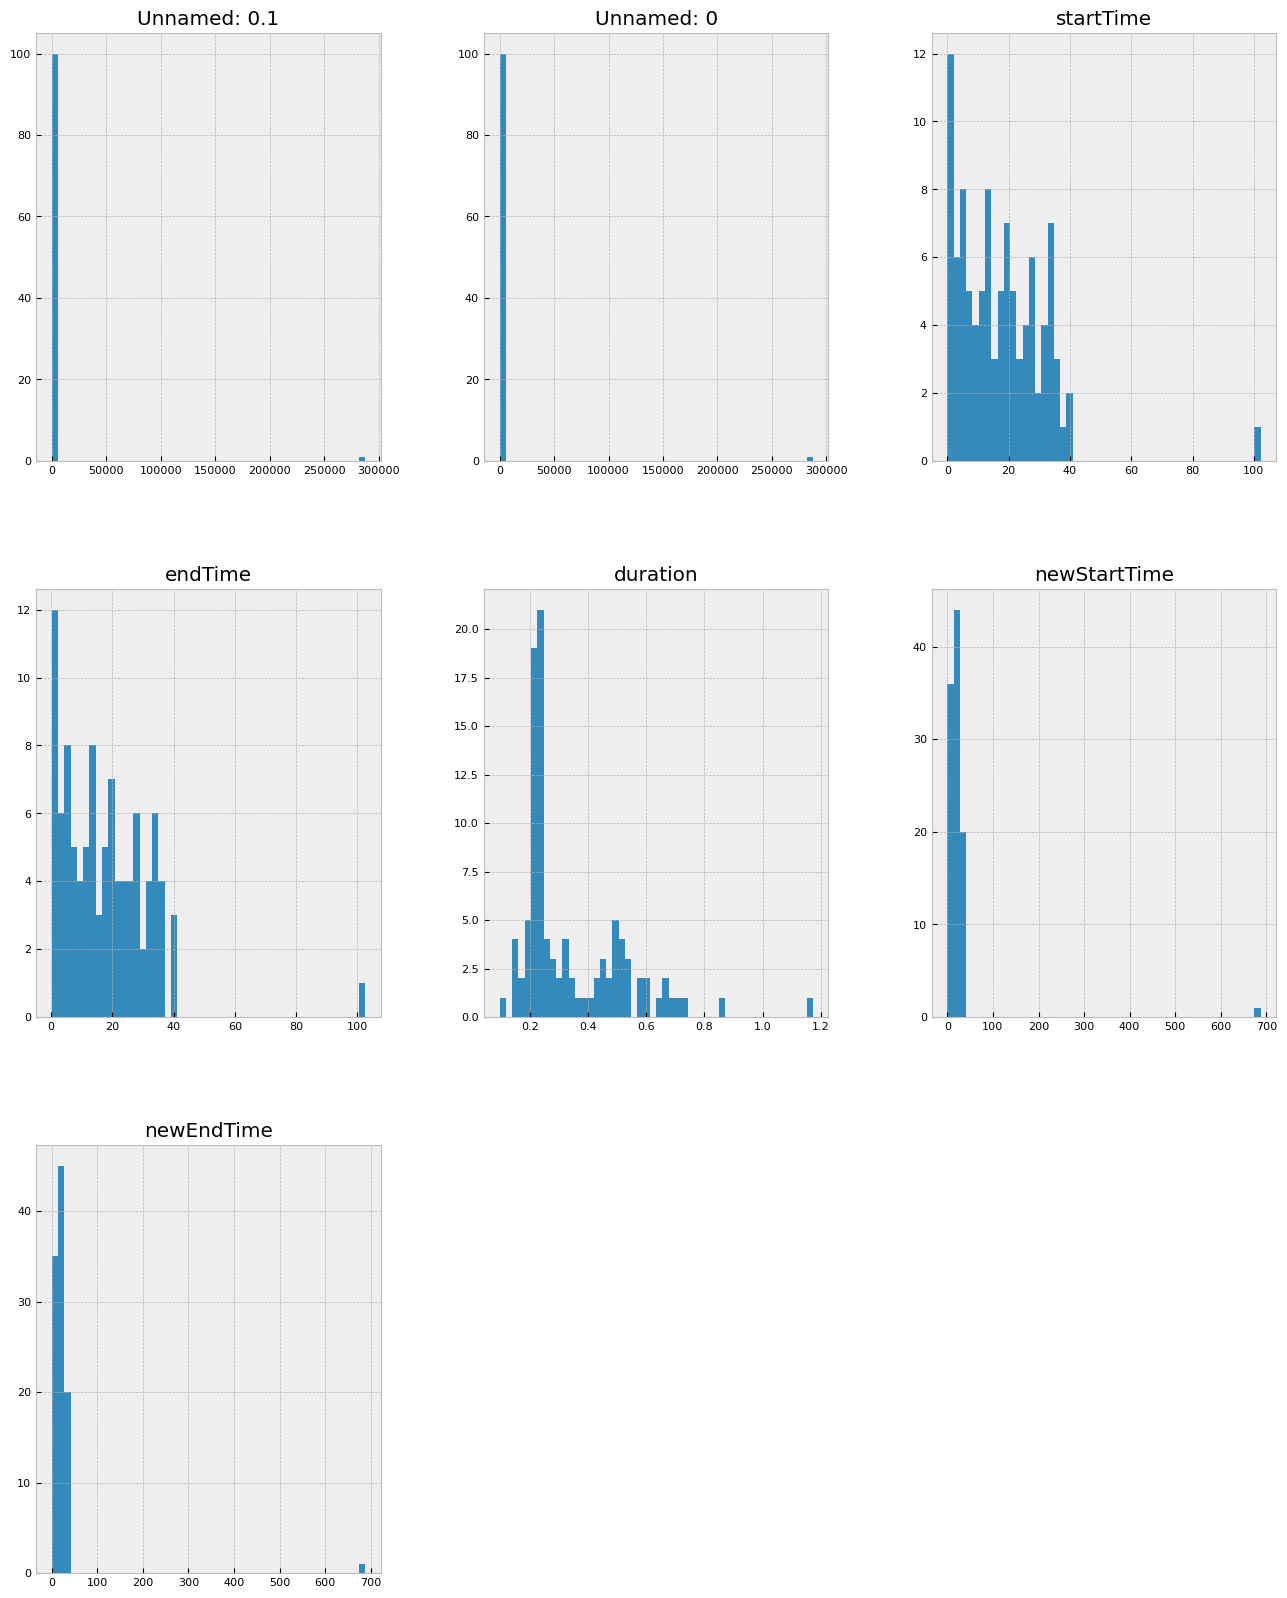

In [10]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [11]:
df_num_corr = df_num.corr()['startTime'][:-1] # -1 because the latest row is Start Time
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Start Time:\n{}".format(len(golden_features_list), golden_features_list))

There is 5 strongly correlated values with Start Time:
startTime       1.000000
endTime         0.999924
newStartTime    0.603014
Unnamed: 0.1    0.593664
Unnamed: 0      0.593664
Name: startTime, dtype: float64


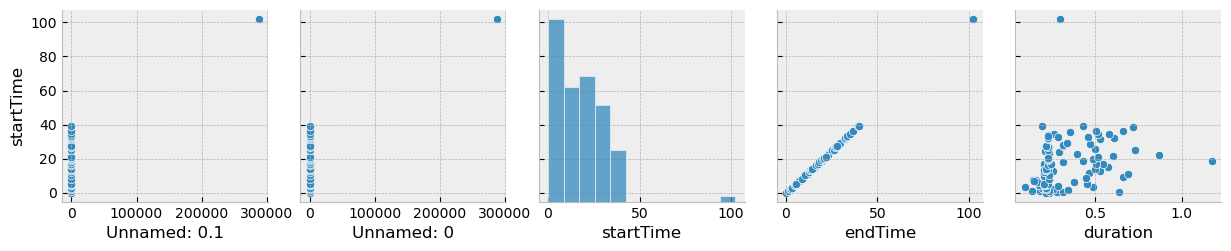

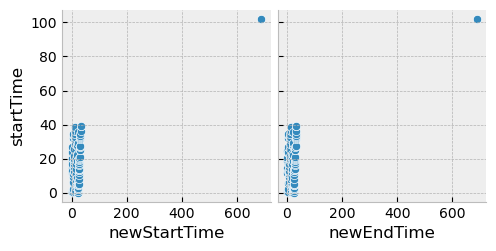

In [12]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['startTime'])

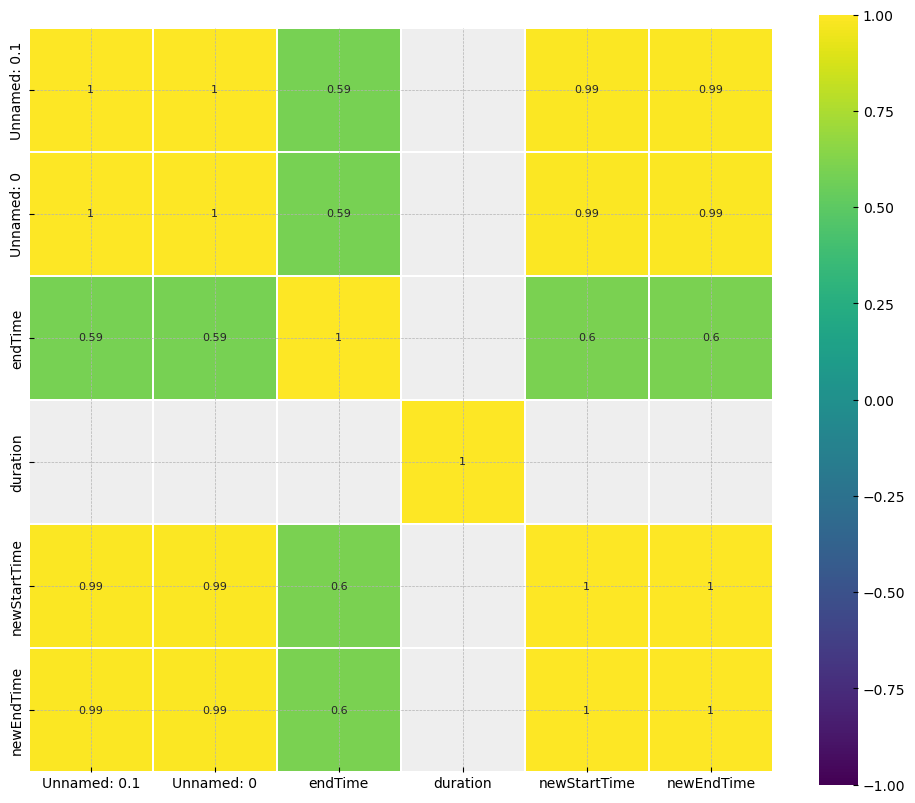

In [13]:
corr = df_num.drop('startTime', axis=1).corr() # We already examined startTime correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

/tmp/ipykernel_20/1209976526.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


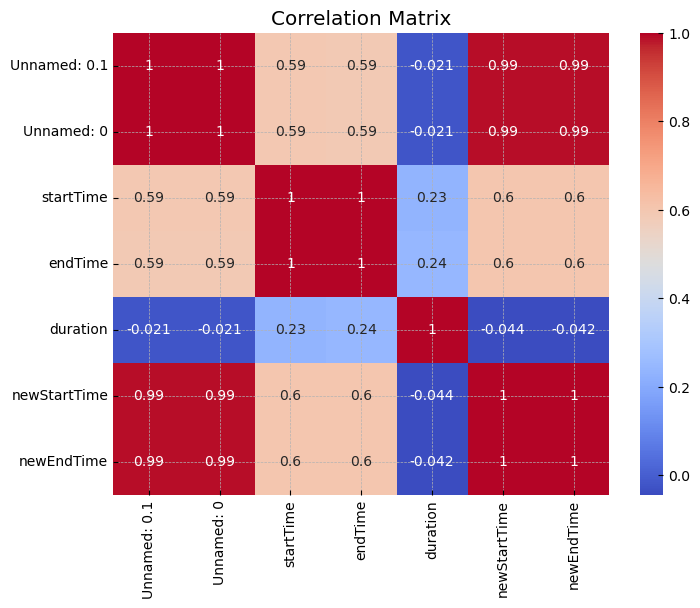

In [14]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [15]:
quantitative_features_list = ['Unnamed: 0.1', 'Unnamed: 0', 'endTime', 'duration', 'newStartTime', 'newEndTime', 'startTime']
df_quantitative_values = df[quantitative_features_list]
df_quantitative_values.head()

,Unnamed: 0.1,Unnamed: 0,endTime,duration,newStartTime,newEndTime,startTime
0,0,0,1.501389,0.139881,0.000000,0.139881,1.361508
1,1,1,11.768649,0.205159,0.139881,0.345040,11.563490
2,2,2,14.710000,0.220000,0.345040,0.565040,14.490000
3,3,3,18.850000,0.240000,0.565040,0.805040,18.610000
4,4,4,20.840000,0.230000,0.805040,1.035040,20.610000


In [16]:
features_to_analyse = [x for x in quantitative_features_list if x in golden_features_list]
features_to_analyse.append('startTime')
features_to_analyse

['Unnamed: 0.1',
 'Unnamed: 0',
 'endTime',
 'newStartTime',
 'startTime',
 'startTime']